In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
# define the number of splits
num_splits = 3

# create a dictionary to store the variables for each split
data = {}
for i in range(1, num_splits + 1):
    folder_path = f"Split {i}"
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    sorted_file_names = sorted(file_names, key=lambda name: -float(pd.read_csv(os.path.join(folder_path, name)).iloc[0, 1]))
    model_names = ['Matern * Periodic', 
                   'SE * Periodic',
                   'Rational * Periodic',
                   'SE * Cosine',
                   'Rational + Periodic',
                   'Non-Stationary',
                   'SE + Periodic',
                  ]
    sorted_model_names_split = [model_names[file_names.index(name)] for name in sorted_file_names]
    data[i] = {'folder_path': folder_path,
               'file_names': file_names,
               'sorted_file_names': sorted_file_names,
               'sorted_model_names': sorted_model_names_split
              }

# sort the file names based on Split 3
split_3_folder_path = data[3]['folder_path']
split_3_filenames = data[3]['sorted_file_names']
split_3_sorted_file_names = sorted(split_3_filenames, key=lambda name: -float(pd.read_csv(os.path.join(split_3_folder_path, name)).iloc[0, 1]))

# print the sorted file names for Split 3
print(split_3_sorted_file_names)

['SE_Cos_errors.csv', 'SE_plus_Per_errors.csv', 'Rat_plus_Per_errors.csv', 'Matern_Per_errors.csv', 'SE_Per_errors.csv', 'RatPer_errors.csv', 'NS_kernel_errors.csv']


In [31]:
# define the number of splits
num_splits = 3

# create a dictionary to store the variables for each split
data = {}
for i in range(1, num_splits + 1):
    folder_path = f"Split {i}"
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    sorted_file_names = sorted(file_names, key=lambda name: float(pd.read_csv(os.path.join(folder_path, name)).iloc[0, 1]))
    model_names = ['Matern * Periodic', 
                   'SE * Periodic',
                   'Rational * Periodic',
                   'SE * Cosine',
                   'Rational + Periodic',
                   'Non-Stationary',
                   'SE + Periodic',
                  ]
    sorted_model_names_split = [model_names[file_names.index(name)] for name in sorted_file_names]
    data[i] = {'folder_path': folder_path,
               'file_names': file_names,
               'sorted_file_names': sorted_file_names,
               'sorted_model_names': sorted_model_names_split
              }

# sort the file names based on Split 3
split_3_folder_path = data[3]['folder_path']
split_3_filenames = data[3]['sorted_file_names']
split_3_sorted_file_names = sorted(split_3_filenames, key=lambda name: -float(pd.read_csv(os.path.join(split_3_folder_path, name)).iloc[0, 1]))

# print the sorted file names for Split 3
print(sorted_model_names_split)

['Non-Stationary', 'Rational * Periodic', 'SE * Periodic', 'Matern * Periodic', 'Rational + Periodic', 'SE + Periodic', 'SE * Cosine']


In [34]:
def plot_errors(splits):
    
    # create empty lists to store all the error values for all splits
    all_mse_values = []
    all_mae_values = []
    
    # create empty lists to store the model names and file names for all splits
    all_sorted_model_names = []
    all_sorted_file_names = []
    
    # loop over all specified splits
    for split in splits:
        
        # get the variables for the specified split from the data dictionary
        folder_path = data[split]['folder_path']
        filenames = data[split]['sorted_file_names']
        sorted_model_names = data[split]['sorted_model_names']

        mse_values_all = []
        mae_values_all = []

        for i, filename in enumerate(filenames):
            # Reading the CSV file
            df = pd.read_csv(os.path.join(folder_path, filename))

            # Extracting the RMSE and MAE values
            mse_value = np.sqrt(df[df['Metric'] == 'MSE']['Value'].values[0])
            mae_value = df[df['Metric'] == 'MAE']['Value'].values[0]

            # Append the RMSE and MAE values to the corresponding lists
            mse_values_all.append(mse_value)
            mae_values_all.append(mae_value)

        # Append the model names and file names to the corresponding lists
        all_sorted_model_names.extend(sorted_model_names)
        all_sorted_file_names.extend(filenames)
        
        # Append the error values to the corresponding lists
        all_mse_values.extend(mse_values_all)
        all_mae_values.extend(mae_values_all)

    # Creating the bar chart
    num_models = len(model_names)
    num_splits = len(splits)
    bar_width = 0.15  # define the width of each bar
    bar_spacing = 0.02  # define the spacing between bars within a group
    group_spacing = 0.1  # define the spacing between groups of bars for different models

    fig, ax = plt.subplots(figsize=(12, 8))

    # plot the bars for each model and split
    for model_idx in range(num_models):
        for split_idx, split in enumerate(splits):
            split = int(split)
            base_pos = model_idx * (num_splits * (bar_width + bar_spacing) + group_spacing)  # base position for each model

            mse_pos = base_pos + split_idx * (bar_width + bar_spacing)
            mae_pos = base_pos + bar_width + split_idx * (bar_width + bar_spacing)

            mse_value = all_mse_values[model_idx + split_idx * num_models]
            mae_value = all_mae_values[model_idx + split_idx * num_models]

            # plot the MSE and MAE bars
            ax.bar(mse_pos, mse_value, bar_width, color='tab:orange', label='RMSE' if model_idx == 0 else None)
            ax.bar(mse_pos, mae_value, bar_width, alpha=0.7, color='tab:blue', bottom=mse_value, label='MAE' if model_idx == 0 else None)

    x_pos = np.arange(0, num_models * (len(splits) * (bar_width + bar_spacing) + group_spacing), len(splits) * (bar_width + bar_spacing) + group_spacing) + bar_width / 2
    plt.xticks(x_pos, sorted_model_names_split, rotation='vertical')
    plt.xlabel('Model')
    plt.ylabel('Error')
    #plt.legend()
    plt.show()

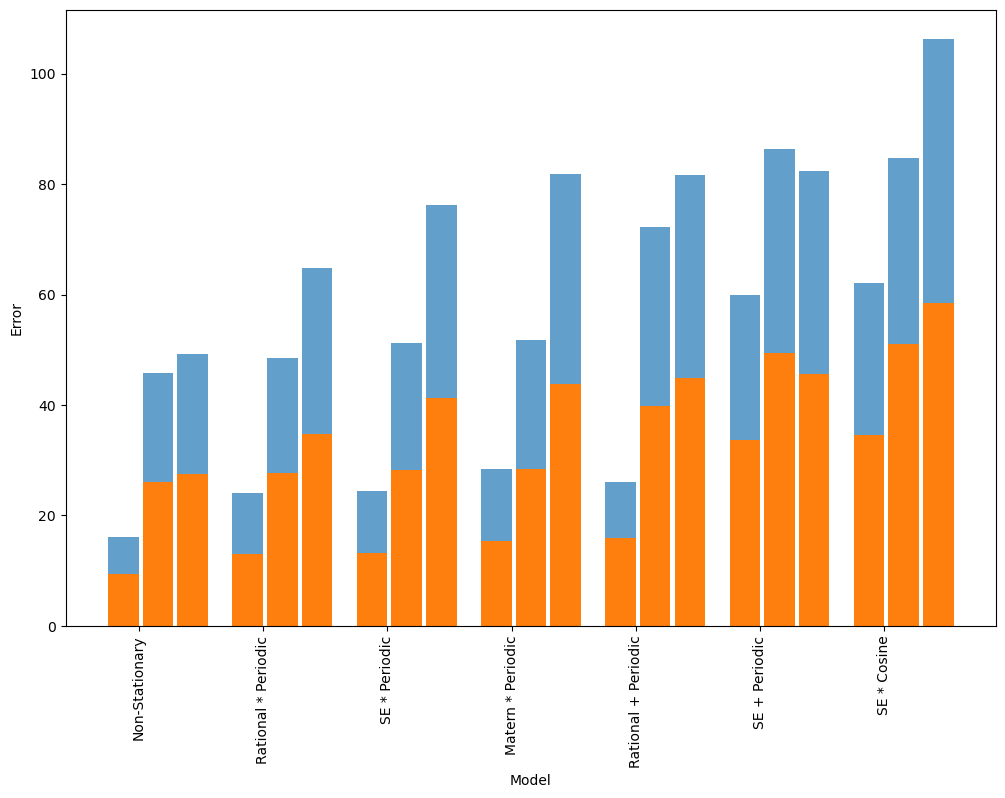

In [35]:
plot_errors([1,2,3])

## Qualitative Model Evaluation

In [5]:
df = pd.read_csv('../../../../Data/Savitzky-Golay Data/SVG_poly1.csv') # importing data for SVG polyorder = 1
X = ((df.Year).values).reshape(-1,1)
y = (df.Sunspot_Number).values

In [6]:
# load the data from the CSV file
model = pd.read_csv("../GP Model Data/Split 2/SE_plus_Per.csv", index_col=0)

In [7]:
import pymc3
from pymc3.gp.util import plot_gp_dist

X_new = np.linspace(1818, 2023, 1000)[:, None]

fig = plt.figure(figsize=(14, 5))
ax = fig.gca()
ax.set_ylim(0,300)
plot_gp_dist(ax, model.values, X_new, palette="Blues")
plt.plot(X, y, color='r');